In [1]:
!pip install tensorflow

In [2]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


CPU times: total: 9.58 s
Wall time: 13.7 s


In [4]:
df=pd.read_csv("cleaned_data.csv")
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NOx-H15,NOx-H16,NOx-H17,NOx-H18,NOx-H19,NOx-H20,NOx-H21,NOx-H22,NOx-H23,NOx-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.9,8.4,5.7,6.2,6.0,5.9,4.9,3.7,4.4,3.5
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.5,4.0,4.0,3.8,3.6,3.6,3.1,3.8,3.8,3.2
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.6,7.3,5.8,13.3,17.9,21.1,7.4,71.9,7.6,24.8
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,15.9,21.2,31.5,35.1,43.3,31.7,21.4,7.4,24.2,27.2
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.8,18.5,21.6,27.8,31.9,12.0,12.3,12.4,8.4,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.6,9.5,1.3,1.3,1.5,8.0,8.5,9.2,1.4,8.5
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,11.0,1.8,14.2,15.1,9.4,9.4,9.3,1.2,8.1,7.7
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,14.2,12.9,12.2,12.0,11.9,9.5,9.0,9.4,8.1,6.8
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,11.6,9.5,9.4,1.8,15.5,13.0,9.9,13.5,2.3,17.0


# EDA

           SO2-H01      SO2-H02      SO2-H03      SO2-H04      SO2-H05  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000   
mean      0.951963     0.934475     0.912420     0.865023     0.864612   
std       3.574530     2.981239     3.480467     3.055394     2.711996   
min       0.100000     0.100000     0.100000     0.100000     0.100000   
25%       0.400000     0.400000     0.400000     0.400000     0.400000   
50%       0.400000     0.400000     0.400000     0.400000     0.400000   
75%       0.400000     0.400000     0.400000     0.400000     0.400000   
max      68.000000    61.000000    99.000000    62.000000    56.000000   

           SO2-H06      SO2-H07      SO2-H08      SO2-H09      SO2-H10  ...  \
count  2190.000000  2190.000000  2190.000000  2190.000000  2190.000000  ...   
mean      0.902740     1.088813     1.289498     1.633288     2.061461  ...   
std       3.137182     3.278260     3.916435     4.775373     6.039322  ...   
min       0.10000

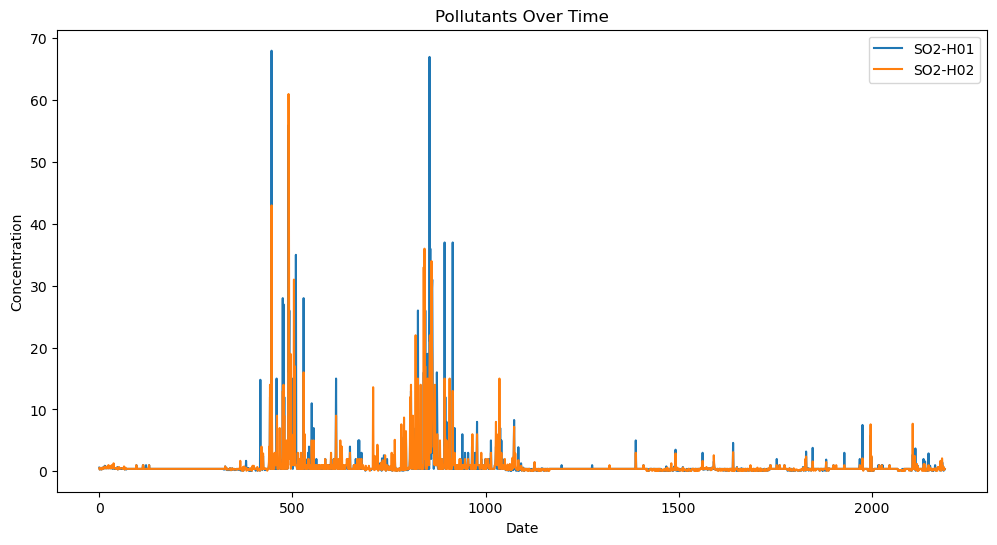

AttributeError: 'RangeIndex' object has no attribute 'month'

In [5]:


# Correcting the 'Date' column name and setting it as the index
#df['Date '] = pd.to_datetime(df['Date '])
#df.set_index('Date ', inplace=True)

# Display Summary Statistics for each pollutant
print(df.describe())

# Time Series Plot for a select few pollutants
# Replace 'SO2-H01', 'SO2-H02', etc., with the pollutants you're interested in
plt.figure(figsize=(12, 6))
plt.plot(df['SO2-H01'], label='SO2-H01')
plt.plot(df['SO2-H02'], label='SO2-H02')
plt.title('Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Seasonality Analysis - Monthly for a sp ecific pollutant
df['Month'] = df.index.month
monthly_pollutant = df.groupby('Month')['SO2-H01'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pollutant.index, y=monthly_pollutant.values)
plt.title('Average Monthly Concentration of SO2-H01')
plt.xlabel('Month')
plt.ylabel('Average Concentration')
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Calculating Hourly Sub index of each pollutant

In [6]:

# Define the function to calculate PM2.5 sub-index
def get_PM25_subindex(pi):
    if pi <= 30:
        return pi * 50 / 30
    elif pi <= 60:
        return 50 + (pi - 30) * 50 / 30
    elif pi <= 90:
        return 100 + (pi - 60) * 100 / 30
    elif pi <= 120:
        return 200 + (pi - 90) * 100 / 30
    elif pi <= 250:
        return 300 + (pi - 120) * 100 / 130
    elif pi > 250:
        return 400 + (pi - 250) * 100 / 130
    else:
        return pi

# Apply the function to each hourly PM2.5 column
for hour in range(1, 25):  # For hours 1 through 24
    pm25_col = f'PM2.5-H{hour:02d}'  # PM2.5 column for the hour
    pmi_col = f'PMI-H{hour:02d}'    # New column for the PMI of the hour
    df[pmi_col] = df[pm25_col].apply(get_PM25_subindex)

df


,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,PMI-H15,PMI-H16,PMI-H17,PMI-H18,PMI-H19,PMI-H20,PMI-H21,PMI-H22,PMI-H23,PMI-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,21.666667,18.333333,10.000000,8.333333,8.333333,8.333333,6.666667,6.666667,6.666667,6.666667
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,6.666667,6.666667,8.333333,10.000000,10.000000,10.000000,10.000000,8.333333,8.333333,8.333333
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,6.666667,6.666667,10.000000,11.666667,13.333333,15.000000,20.000000,21.666667,1.666667,15.000000
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,1.666667,18.333333,18.333333,18.333333,21.666667,21.666667,21.666667,21.666667,21.666667,21.666667
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,23.333333,26.666667,3.333333,36.666667,28.333333,18.333333,20.000000,18.333333,20.000000,21.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,11.666667,1.666667,21.666667,26.666667,28.333333,18.333333,1.666667,18.333333,21.666667,20.000000
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,15.000000,15.000000,1.666667,20.000000,18.333333,18.333333,1.666667,1.666667,15.000000,13.333333
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,18.333333,21.666667,25.000000,23.333333,21.666667,20.000000,20.000000,18.333333,15.000000,15.000000
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,1.666667,1.666667,20.000000,23.333333,26.666667,30.000000,28.333333,25.000000,21.666667,15.000000


In [7]:
## O3 Sub-Index calculation
def get_O3_subindex(oi):
    if oi <= 50:
        return oi * 50 / 50
    elif oi <= 100:
        return 50 + (oi - 50) * 50 / 50
    elif oi <= 168:
        return 100 + (oi - 100) * 100 / 68
    elif oi <= 208:
        return 200 + (oi - 168) * 100 /40
    elif oi <= 748:
        return 300 + (oi - 208) * 100 / 539
    elif oi > 748:
        return 400 + (oi - 400) * 100 / 539
    else:
        return oi

# Apply the function to each hourly O3 column
for hour in range(1, 25):
    o3_col = f'O3-H{hour:02d}'
    o3i_col = f'O3I-H{hour:02d}'  # Updated column name for O3 sub-index
    df[o3i_col] = df[o3_col].apply(get_O3_subindex)

df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,O3I-H15,O3I-H16,O3I-H17,O3I-H18,O3I-H19,O3I-H20,O3I-H21,O3I-H22,O3I-H23,O3I-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,13.0,13.0,2.0,23.0,26.0,28.0,3.0,32.0,32.0,3.0
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,33.0,33.0,33.0,34.0,33.0,32.0,32.0,31.0,31.0,31.0
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,32.0,31.0,27.0,26.0,21.0,18.0,5.0,4.0,12.0,16.0
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,24.0,19.0,1.0,7.0,3.0,7.0,12.0,13.0,1.0,1.0
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,21.0,19.0,16.0,11.0,12.0,26.0,24.0,24.0,25.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,31.0,28.0,25.0,23.0,22.0,24.0,24.0,22.0,21.0,24.0
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,3.0,3.0,25.0,24.0,32.0,35.0,35.0,32.0,34.0,33.0
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,25.0,26.0,27.0,25.0,24.0,24.0,24.0,25.0,26.0,25.0
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,23.0,24.0,23.0,21.0,16.0,17.0,2.0,17.0,9.0,14.0


In [8]:
def get_NO2_subindex(ni):
    if ni <= 40:
        return ni * 50 / 40
    elif ni <= 80:
        return 50 + (ni - 40) * 50 / 40
    elif ni <= 180:
        return 100 + (ni - 80) * 100 / 100
    elif ni <= 280:
        return 200 + (ni - 180) * 100 / 100
    elif ni <= 400:
        return 300 + (ni - 280) * 100 / 120
    elif ni > 400:
        return 400 + (ni - 400) * 100 / 120
    else:
        return ni# Apply the function to each hourly NO2 column

for hour in range(1, 25):
    no2_col = f'NO2-H{hour:02d}'
    ni_col = f'NI-H{hour:02d}'  # Updated column name for NO2 sub-index
    df[ni_col] = df[no2_col].apply(get_NO2_subindex)
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,NI-H15,NI-H16,NI-H17,NI-H18,NI-H19,NI-H20,NI-H21,NI-H22,NI-H23,NI-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,7.625,7.875,5.750,5.875,5.500,5.250,4.750,3.625,4.000,3.500
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,3.125,3.750,3.750,3.625,3.500,3.500,3.000,3.625,3.625,3.125
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,8.625,7.625,1.250,15.750,20.750,2.500,44.625,8.625,33.875,27.875
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,17.000,22.875,31.750,34.625,39.500,33.625,24.250,23.125,27.250,27.875
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,18.250,20.000,24.250,30.625,31.000,7.750,13.875,13.875,9.375,10.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,8.125,9.750,11.125,11.375,11.625,8.750,9.500,10.375,11.500,9.375
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,10.875,11.125,15.875,17.250,10.875,10.750,10.625,11.875,9.375,8.875
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,15.000,14.625,14.000,13.875,13.875,10.875,10.375,10.625,9.375,7.875
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,1.375,10.375,10.750,12.375,17.500,15.250,11.125,15.375,22.750,19.000


In [9]:
def get_SO2_subindex(si):
    if si <= 40:
        return si * 50 / 40
    elif si <= 80:
        return 50 + (si - 40) * 50 / 40
    elif si <= 380:
        return 100 + (si - 80) * 100 / 300
    elif si <= 800:
        return 200 + (si - 380) * 100 / 420
    elif si <= 1600:
        return 300 + (si - 800) * 100 / 800
    elif si > 1600:
        return 400 + (si - 1600) * 100 / 800
    else:
        return si
    # Apply the function to each hourly SO2 column
for hour in range(1, 25):
    so2_col = f'SO2-H{hour:02d}'
    si_col = f'SI-H{hour:02d}'  # Updated column name for SO2 sub-index
    df[si_col] = df[so2_col].apply(get_SO2_subindex)
df

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,SI-H15,SI-H16,SI-H17,SI-H18,SI-H19,SI-H20,SI-H21,SI-H22,SI-H23,SI-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,0.500,0.500,0.500,0.500,0.500,0.375,0.375,0.375,0.375,0.375
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,0.500,0.500,0.500,0.500,0.625,0.500,0.625,0.750,0.625,0.500
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,0.625,0.625,0.625,0.625,0.625,0.625,0.500,0.500,0.500,0.625
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,0.875,0.875,1.125,1.000,0.750,0.500,0.500,0.500,0.500,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,0.625,0.375,0.250,0.125,0.125,0.125,0.125,0.125,0.125,0.125
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,1.125,1.000,0.500,0.250,0.250,0.500,0.500,0.500,0.625,0.625
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,0.500,0.500,0.500,0.375,0.375,0.250,0.250,0.250,0.250,0.250
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,0.250,0.125,0.125,0.125,0.125,0.125,0.125,0.500,0.500,0.500


In [10]:
# Apply the function to each hourly CO column
def get_CO_subindex(ci):
    if ci <= 1:
        return ci * 50 / 1
    elif ci <= 2:
        return 50 + (ci - 1) * 50 / 1
    elif ci <= 10:
        return 100 + (ci - 2) * 100 / 8
    elif ci <= 17:
        return 200 + (ci - 10) * 100 / 7
    elif ci <= 34:
        return 300 + (ci - 17) * 100 / 17
    elif ci > 34:
        return 400 + (ci - 34) * 100 / 17
    else:
        return 0
for hour in range(1, 25):
    co_col = f'CO-H{hour:02d}'
    ci_col = f'CI-H{hour:02d}'  # Updated column name for CO sub-index
    df[ci_col] = df[co_col].apply(get_CO_subindex)
df

C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\2116071872.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ci_col] = df[co_col].apply(get_CO_subindex)
C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\2116071872.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ci_col] = df[co_col].apply(get_CO_subindex)
C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\2116071872.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,CI-H15,CI-H16,CI-H17,CI-H18,CI-H19,CI-H20,CI-H21,CI-H22,CI-H23,CI-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,9.5,10.0,10.0,10.0,10.0,10.5,10.5,10.5,11.0,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,11.5,12.5,12.0,12.5,12.5,11.5,11.5,11.5,8.0,9.0
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,10.0,8.5,8.5,6.5,5.0,45.0,5.0,6.5,10.5,10.5
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,13.5,12.5,12.5,12.0,13.0,12.5,12.0,12.0,10.0,8.5
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,13.0,13.5,12.5,14.5,15.0,13.5,13.0,13.5,18.0,16.0


# Hourly AQI Generation

In [11]:
# Function to calculate AQI from the sub-indices
def calculate_hourly_aqi(row):
    # Extracting the sub-indices for each pollutant for a specific hour
    hourly_aqi_values = [row[f'CI-H{hour:02d}'], row[f'SI-H{hour:02d}'], 
                         row[f'NI-H{hour:02d}'], row[f'O3I-H{hour:02d}'], 
                         row[f'PMI-H{hour:02d}']]
    # The AQI is the maximum of these sub-indices
    return max(hourly_aqi_values)

# Calculate AQI for each hour and store in new columns
for hour in range(1, 25):
    aqi_col = f'AQI-H{hour:02d}'
    df[aqi_col] = df.apply(calculate_hourly_aqi, axis=1)

# Now 'df' contains the AQI for each hour
df

C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\3742332413.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[aqi_col] = df.apply(calculate_hourly_aqi, axis=1)
C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\3742332413.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[aqi_col] = df.apply(calculate_hourly_aqi, axis=1)
C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\3742332413.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor

,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,AQI-H15,AQI-H16,AQI-H17,AQI-H18,AQI-H19,AQI-H20,AQI-H21,AQI-H22,AQI-H23,AQI-H24
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,21.666667,18.333333,10.00,23.000000,26.000000,28.000000,10.500000,32.000000,32.000000,10.500000
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,33.000000,33.000000,33.00,34.000000,33.000000,32.000000,32.000000,31.000000,31.000000,31.000000
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,32.000000,31.000000,27.00,26.000000,21.000000,18.000000,44.625000,21.666667,33.875000,27.875000
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,24.000000,22.875000,31.75,34.625000,39.500000,33.625000,24.250000,23.125000,27.250000,27.875000
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,23.333333,26.666667,24.25,36.666667,31.000000,26.000000,24.000000,24.000000,25.000000,21.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,31.000000,28.000000,25.00,26.666667,28.333333,24.000000,24.000000,22.000000,21.666667,24.000000
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,15.000000,15.000000,25.00,24.000000,32.000000,45.000000,35.000000,32.000000,34.000000,33.000000
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,25.000000,26.000000,27.00,25.000000,24.000000,24.000000,24.000000,25.000000,26.000000,25.000000
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,23.000000,24.000000,23.00,23.333333,26.666667,30.000000,28.333333,25.000000,22.750000,19.000000


# Overall AQI

In [12]:
# Calculate the average of the hourly AQI values
hourly_aqi_columns = [f'AQI-H{hour:02d}' for hour in range(1, 25)]
df['Overall_AQI_Avg'] = df[hourly_aqi_columns].mean(axis=1)
df


C:\Users\rutvi\AppData\Local\Temp\ipykernel_16340\220389797.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Overall_AQI_Avg'] = df[hourly_aqi_columns].mean(axis=1)


,City,Date,SO2-H01,SO2-H02,SO2-H03,SO2-H04,SO2-H05,SO2-H06,SO2-H07,SO2-H08,...,AQI-H16,AQI-H17,AQI-H18,AQI-H19,AQI-H20,AQI-H21,AQI-H22,AQI-H23,AQI-H24,Overall_AQI_Avg
0,Ottawa Downtown,1/1/2022,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,...,18.333333,10.00,23.000000,26.000000,28.000000,10.500000,32.000000,32.000000,10.500000,34.071181
1,Ottawa Downtown,1/2/2022,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,...,33.000000,33.00,34.000000,33.000000,32.000000,32.000000,31.000000,31.000000,31.000000,28.312500
2,Ottawa Downtown,1/3/2022,0.3,0.4,0.4,0.3,0.3,0.3,0.3,0.3,...,31.000000,27.00,26.000000,21.000000,18.000000,44.625000,21.666667,33.875000,27.875000,27.001736
3,Ottawa Downtown,1/4/2022,0.4,0.5,0.4,0.4,0.4,0.6,0.5,0.5,...,22.875000,31.75,34.625000,39.500000,33.625000,24.250000,23.125000,27.250000,27.875000,25.494792
4,Ottawa Downtown,1/5/2022,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.4,...,26.666667,24.25,36.666667,31.000000,26.000000,24.000000,24.000000,25.000000,21.666667,24.791667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Windsor Downtown,12/27/2022,0.8,0.8,0.7,0.7,1.1,0.6,0.7,0.6,...,28.000000,25.00,26.666667,28.333333,24.000000,24.000000,22.000000,21.666667,24.000000,23.788194
2186,Windsor Downtown,12/28/2022,0.1,0.2,0.2,0.3,0.2,0.2,0.1,0.1,...,15.000000,25.00,24.000000,32.000000,45.000000,35.000000,32.000000,34.000000,33.000000,27.166667
2187,Windsor Downtown,12/29/2022,0.5,0.5,0.5,0.5,0.4,0.3,0.2,0.2,...,26.000000,27.00,25.000000,24.000000,24.000000,24.000000,25.000000,26.000000,25.000000,25.263889
2188,Windsor Downtown,12/30/2022,0.2,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,24.000000,23.00,23.333333,26.666667,30.000000,28.333333,25.000000,22.750000,19.000000,23.878472


# Building Long-Short Term Memory

In [13]:
values = df['Overall_AQI_Avg'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Function to create a dataset for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1  # Number of previous time steps to consider
X, Y = create_dataset(scaled_values, look_back)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], look_back, 1))
X_test = X_test.reshape((X_test.shape[0], look_back, 1))
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Optionally, print a few rows of the data
print("First few rows of X_train:")
print(X_train[:5])
print("First few rows of y_train:")
print(y_train[:5])

Shape of X_train: (1750, 1, 1)
Shape of y_train: (1750,)
Shape of X_test: (438, 1, 1)
Shape of y_test: (438,)
First few rows of X_train:
[[[0.41203454]]

 [[0.34565569]]

 [[0.47861576]]

 [[0.11980572]]

 [[0.45635456]]]
First few rows of y_train:
[0.34592553 0.48488937 0.2582299  0.14490016 0.48954398]


In [14]:


# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))  # 50 units in the LSTM layer
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
# Fit the model to the training data
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100

44/44 [==============================] - 4s 23ms/step - loss: 0.1137 - val_loss: 0.0969
Epoch 2/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0702 - val_loss: 0.0569
Epoch 3/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0377 - val_loss: 0.0288
Epoch 4/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0198 - val_loss: 0.0175
Epoch 5/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0155
Epoch 6/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0153
Epoch 7/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0144 - val_loss: 0.0152
Epoch 8/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.0150
Epoch 9/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0141 - val_loss: 0.0150
Epoch 10/100
44/44 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 0.0149
Epoch 1

In [16]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

# Making predictions
predictions = model.predict(X_test)

# Optionally, compare predictions with actual values or calculate other metrics


14/14 [==============================] - 0s 3ms/step - loss: 0.0115
Test Loss: 0.011482090689241886
14/14 [==============================] - 1s 4ms/step


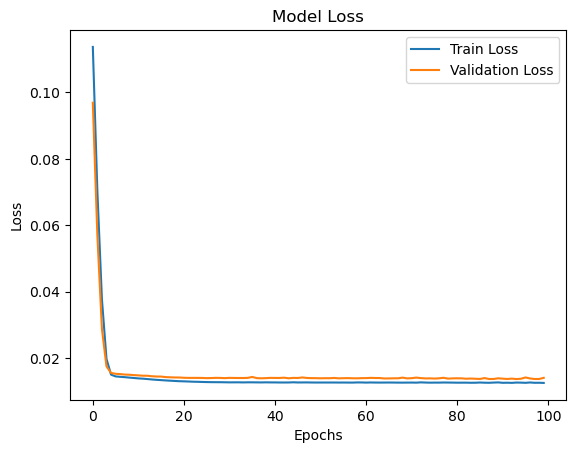

In [17]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [18]:
# Starting with the last 'look_back' data points from your original dataset
input_seq = scaled_values[-look_back:]  # Reshape this as done for training

# Reshape input for the model
input_seq = input_seq.reshape((1, look_back, 1))

# Forecasting the next value
predicted_value_scaled = model.predict(input_seq)

# Inverse transform the scaled value if necessary
predicted_value = scaler.inverse_transform(predicted_value_scaled)

print("Predicted Value:", predicted_value)


1/1 [==============================] - 0s 56ms/step
Predicted Value: [[23.893467]]


In [19]:
future_steps = 5  # Number of steps you want to forecast into the future
future_predictions = []

for _ in range(future_steps):
    # Predict the next value
    predicted_value_scaled = model.predict(input_seq)

    # Inverse scale and store the prediction
    predicted_value = scaler.inverse_transform(predicted_value_scaled)
    future_predictions.append(predicted_value[0][0])

    # Update the input sequence for the next prediction
    # Shift the sequence one step forward and append the new prediction
    input_seq = np.roll(input_seq, -1, axis=1)
    input_seq[0, -1, 0] = predicted_value_scaled[0, 0]

print("Future Predictions:", future_predictions)


1/1 [==============================] - 0s 46ms/step
Future Predictions: [23.893467, 25.29725, 26.110174, 26.587755, 26.870665]


In [20]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculating metrics for the training set
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)

# Calculating metrics for the testing set
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)

# Print metrics
print("Training Data - MAE:", train_mae, ", MSE:", train_mse, ", RMSE:", train_rmse)
print("Testing Data - MAE:", test_mae, ", MSE:", test_mse, ", RMSE:", test_rmse)


14/14 [==============================] - 0s 5ms/step
Training Data - MAE: 0.08717259480236178 , MSE: 0.012940305734108879 , RMSE: 0.11375546463405123
Testing Data - MAE: 0.0828496587513353 , MSE: 0.011482089903917792 , RMSE: 0.10715451415557718


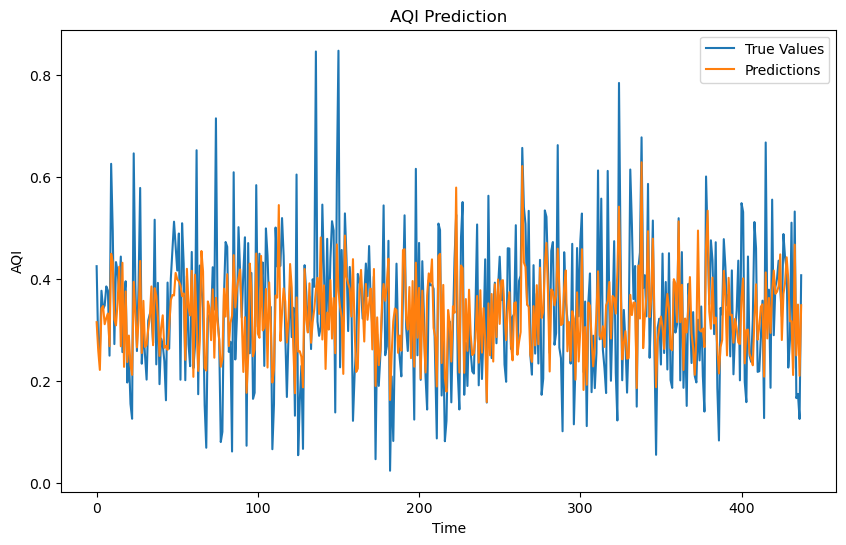

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(test_predictions, label='Predictions')
plt.title('AQI Prediction')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.show()


# HyperParameter Tuning

In [22]:
    import numpy as np
    from sklearn.model_selection import train_test_split, KFold
    from sklearn.metrics import mean_squared_error
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from sklearn.preprocessing import MinMaxScaler

    # Assuming you have X_train and y_train
    # X_train = ...
    # y_train = ...

    # Reshape data for LSTM
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

    # Define the model creation function
    def create_model(units, optimizer):
        model = Sequential()
        model.add(LSTM(units, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(Dense(1))
        model.compile(optimizer=optimizer, loss='mean_squared_error')
        return model

    # Define the parameter grid
    param_grid = {
        'units': [50, 100],
        'optimizer': ['adam', 'rmsprop'],
        'batch_size': [32, 64],
        'epochs': [50, 100]
    }

    # Prepare for manual grid search
    best_score = float("inf")
    best_params = None

    for units in param_grid['units']:
        for optimizer in param_grid['optimizer']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    # Create model with current set of parameters
                    model = create_model(units=units, optimizer=optimizer)

                    # Train the model
                    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                    # Evaluate the model
                    mse = model.evaluate(X_train, y_train, verbose=0)
                    print(f"Units: {units}, Optimizer: {optimizer}, Batch Size: {batch_size}, Epochs: {epochs}, MSE: {mse}")

                    # Update best score and parameters
                    if mse < best_score:
                        best_score = mse
                        best_params = {'units': units, 'optimizer': optimizer, 'batch_size': batch_size, 'epochs': epochs}

    # Print best parameters
    print("Best parameters:", best_params)


Units: 50, Optimizer: adam, Batch Size: 32, Epochs: 50, MSE: 0.012800932861864567
Units: 50, Optimizer: adam, Batch Size: 32, Epochs: 100, MSE: 0.012725175358355045
Units: 50, Optimizer: adam, Batch Size: 64, Epochs: 50, MSE: 0.012874000705778599
Units: 50, Optimizer: adam, Batch Size: 64, Epochs: 100, MSE: 0.012767927721142769
Units: 50, Optimizer: rmsprop, Batch Size: 32, Epochs: 50, MSE: 0.01290855836123228
Units: 50, Optimizer: rmsprop, Batch Size: 32, Epochs: 100, MSE: 0.012774186208844185
Units: 50, Optimizer: rmsprop, Batch Size: 64, Epochs: 50, MSE: 0.012841365300118923
Units: 50, Optimizer: rmsprop, Batch Size: 64, Epochs: 100, MSE: 0.013141687028110027
Units: 100, Optimizer: adam, Batch Size: 32, Epochs: 50, MSE: 0.01275335717946291
Units: 100, Optimizer: adam, Batch Size: 32, Epochs: 100, MSE: 0.01296382024884224
Units: 100, Optimizer: adam, Batch Size: 64, Epochs: 50, MSE: 0.01283473614603281
Units: 100, Optimizer: adam, Batch Size: 64, Epochs: 100, MSE: 0.01269590388983488

In [23]:
# Rebuild the model using the best hyperparameters
best_model = create_model(units=best_params['units'], optimizer=best_params['optimizer'])


# Retrain the model
best_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)


Epoch 1/100
55/55 [==============================] - 3s 5ms/step - loss: 0.0922
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0373
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0163
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0146
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0141
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0138
Epoch 7/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0135
Epoch 8/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 9/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0132
Epoch 10/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 11/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0130
Epoch 12/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0130
Epoch 13/100
55/55 [=================

In [24]:
# Make predictions with the optimized model
optimized_predictions = best_model.predict(X_test)



14/14 [==============================] - 0s 3ms/step


In [25]:
# Evaluate predictions
optimized_mse = mean_squared_error(y_test, optimized_predictions)
optimized_rmse = np.sqrt(optimized_mse)

print("Optimized Model - MSE:", optimized_mse, "RMSE:", optimized_rmse)


Optimized Model - MSE: 0.011304944394581662 RMSE: 0.10632471205971668


# Future General Prediction

In [26]:
from tensorflow.keras.models import load_model

# Assuming your trained model is still in memory as 'model'
# If it's saved in a file, load it:
# model = load_model('your_model_filename.h5')

# Prepare the most recent data point for prediction
most_recent_data = scaled_values[-1].reshape(1, -1)  # Reshape for scaler
scaled_input = scaler.transform(most_recent_data)    # Apply scaling
X_predict = scaled_input.reshape((1, look_back, 1))  # Reshape for LSTM

# Make the prediction
predicted_scaled = model.predict(X_predict)

# Inverse transform the prediction
predicted_aqi = scaler.inverse_transform(predicted_scaled)
print("Predicted Future AQI:", predicted_aqi[0][0])


1/1 [==============================] - 0s 483ms/step
Predicted Future AQI: 13.344452


# Future Predictions on each City

In [27]:
from tensorflow.keras.models import load_model

# Load your trained LSTM model
# model = load_model('your_model_filename.h5')

# Assuming 'df' is your DataFrame with AQI data and a 'City' column
cities = df['City'].unique()
city_predictions = {}

for city in cities:
    # Extract the most recent data for this city
    city_data = df[df['City'] == city]['Overall_AQI_Avg'].tail(look_back).values.reshape(-1, 1)
    
    # Scale and reshape the data
    scaled_city_data = scaler.transform(city_data)
    X_city_predict = scaled_city_data.reshape((1, look_back, 1))

    # Make the prediction
    predicted_city_aqi_scaled = model.predict(X_city_predict)
    predicted_city_aqi = scaler.inverse_transform(predicted_city_aqi_scaled)

    # Store the prediction
    city_predictions[city] = predicted_city_aqi[0][0]

# Print the predicted AQI for each city
for city, prediction in city_predictions.items():
    print(f"Predicted AQI for {city}: {prediction}")


1/1 [==============================] - 0s 47ms/step
Predicted AQI for Ottawa Downtown: 22.960201263427734
Predicted AQI for Hamilton Downtown: 24.656705856323242
Predicted AQI for Hamilton Mountain: 25.337289810180664
Predicted AQI for Toronto North: 23.85834312438965
Predicted AQI for Toronto West: 23.268171310424805
Predicted AQI for Windsor Downtown: 24.38697624206543


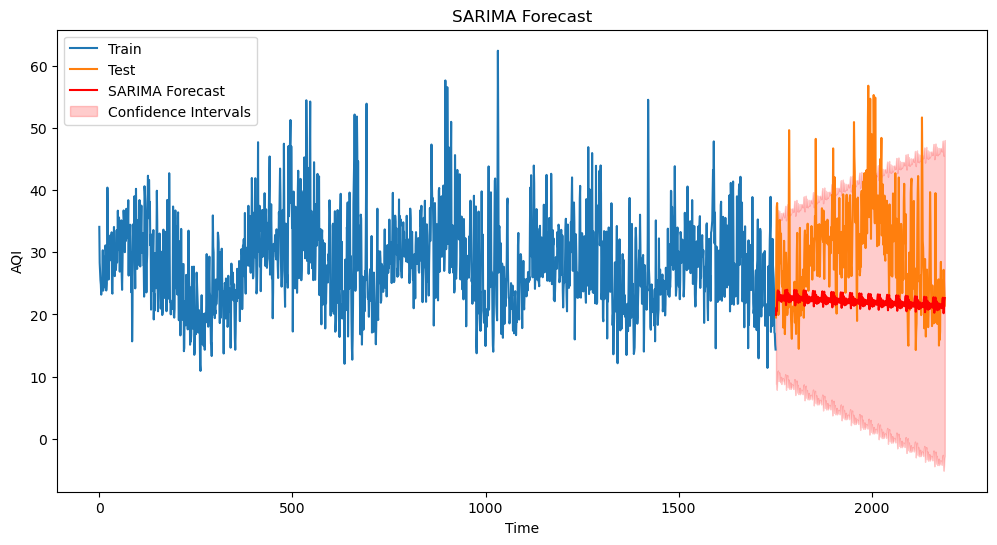

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame with the 'Overall_AQI_Avg' column
# Extracting the time series data
ts_data = df['Overall_AQI_Avg']

# Splitting the data into training and testing sets
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

# SARIMA model configuration
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S) - Assuming hourly data with a seasonality of 24 hours

# Fit SARIMA model
sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Forecasting
forecast_steps = len(test)
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)

# Confidence intervals
confidence_intervals = sarima_forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(sarima_forecast.predicted_mean.index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2, label='Confidence Intervals')
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('AQI')
plt.legend()
plt.show()


C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


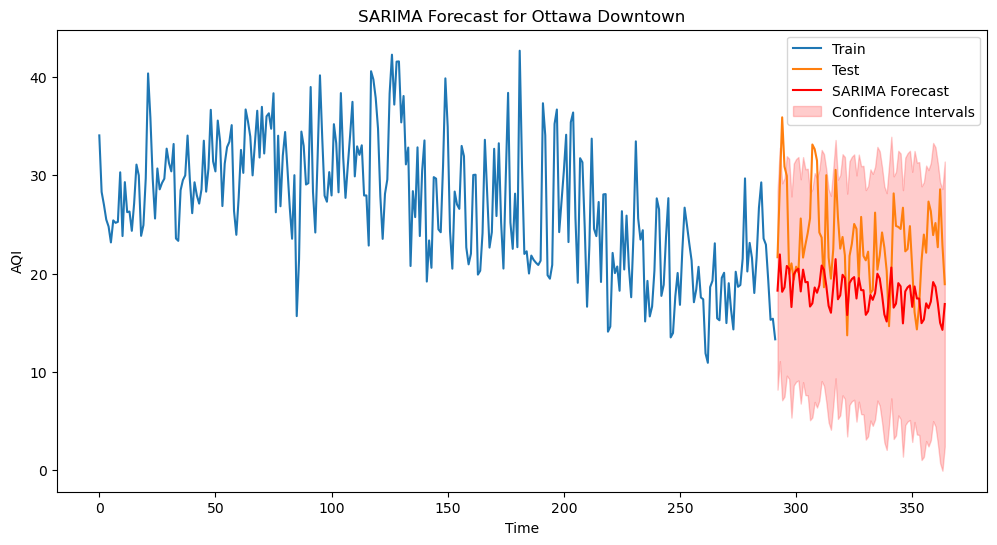

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

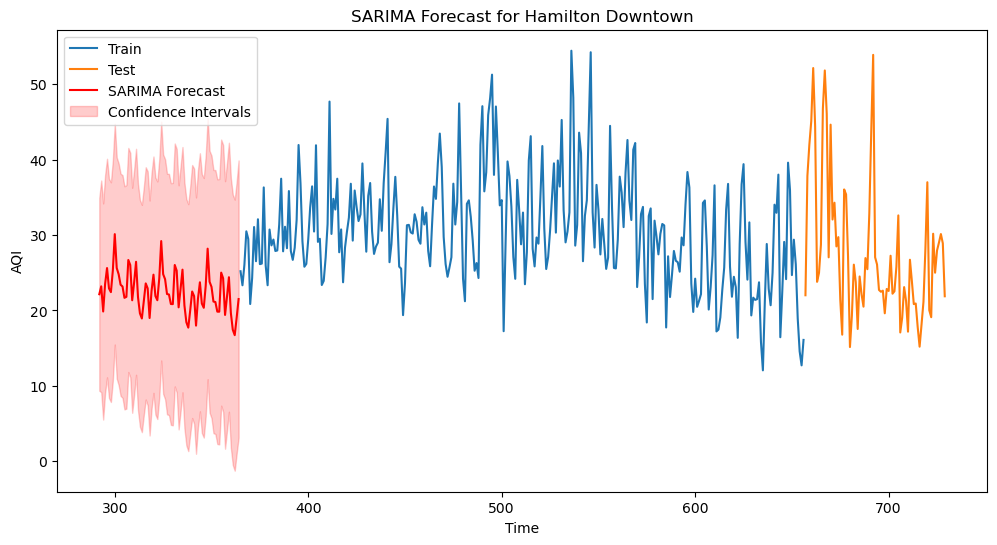

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

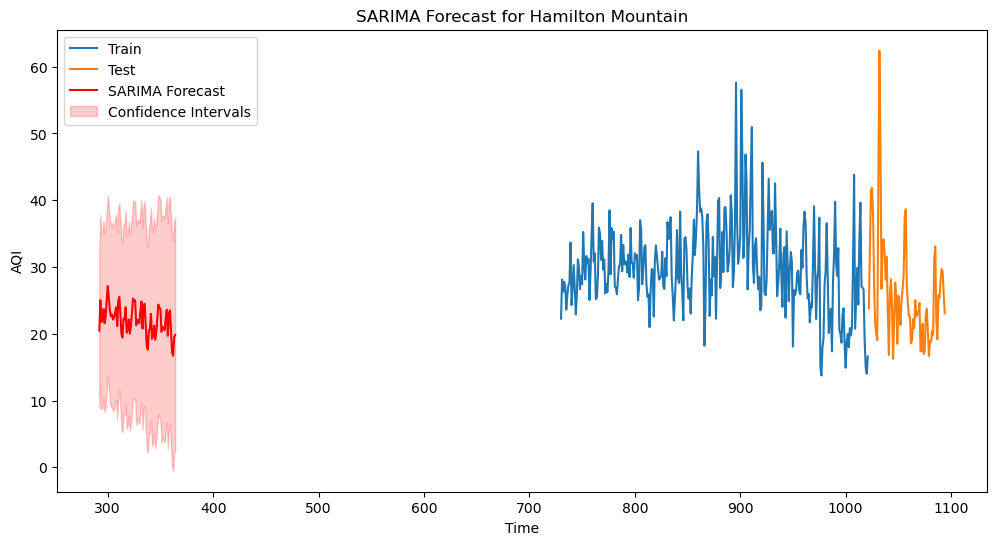

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

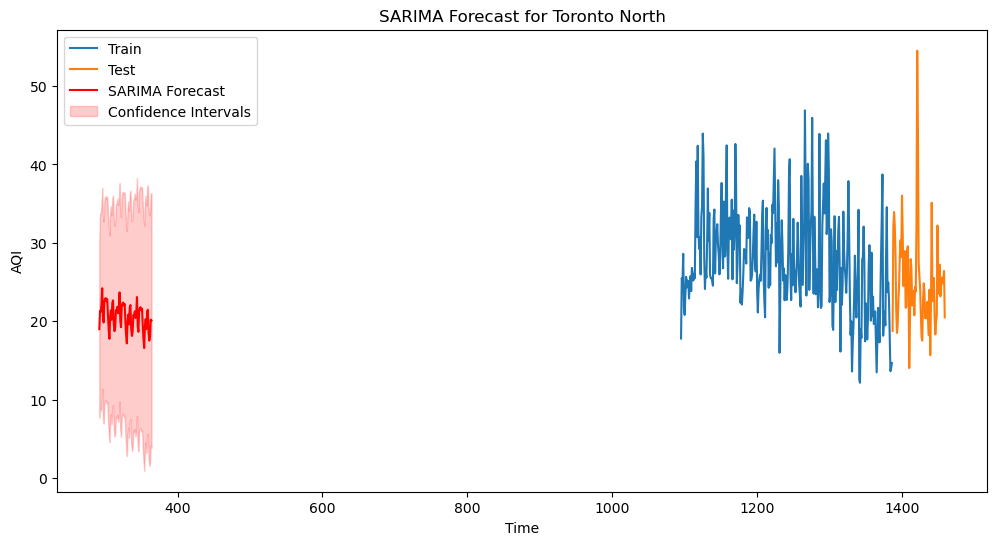

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

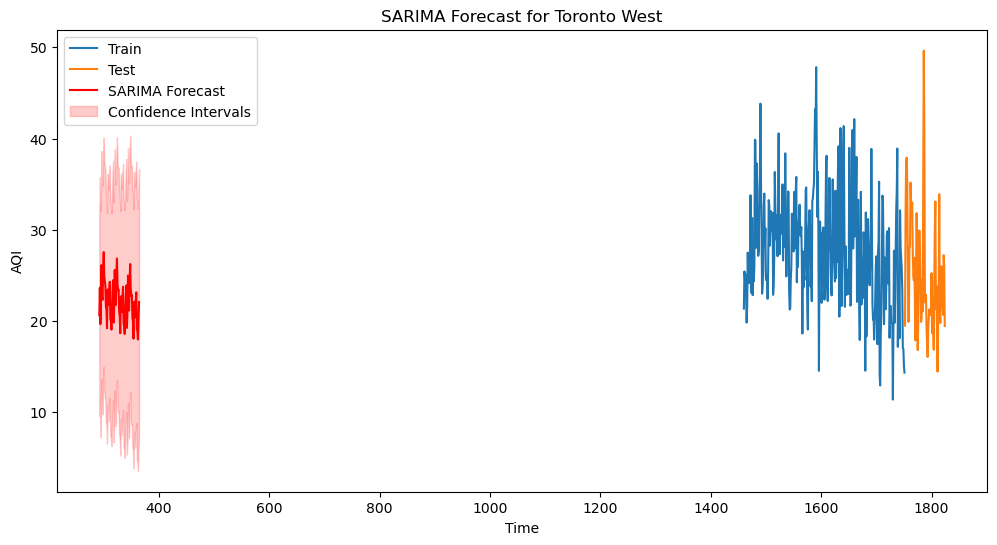

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


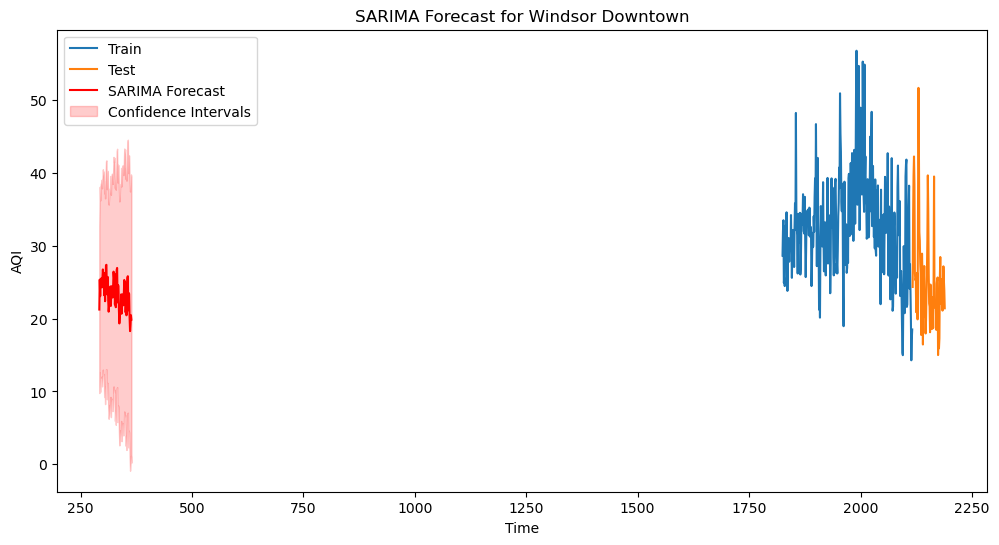

In [29]:


# Assuming df is your DataFrame with the 'Overall_AQI_Avg' and 'City' columns
# Extracting the time series data
ts_data = df[['City', 'Overall_AQI_Avg']]

# Iterate over unique cities and fit SARIMA models
for city in df['City'].unique():
    city_data = ts_data[ts_data['City'] == city]['Overall_AQI_Avg']

    # Splitting the data into training and testing sets
    train_size = int(len(city_data) * 0.8)
    train, test = city_data[:train_size], city_data[train_size:]

    # SARIMA model configuration
    order = (1, 1, 1)  # (p, d, q)
    seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S) - Assuming hourly data with a seasonality of 24 hours

    # Fit SARIMA model
    sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    sarima_results = sarima_model.fit()

    # Forecasting
    forecast_steps = len(test)
    sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
    
    

    # Confidence intervals
    confidence_intervals = sarima_forecast.conf_int()

    # Plotting for each city
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(sarima_forecast.predicted_mean.index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='red')
    plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2, label='Confidence Intervals')
    plt.title(f'SARIMA Forecast for {city}')
    plt.xlabel('Time')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()



In [30]:
# Forecasting
forecast_steps = len(test)
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)

# Create a new DataFrame with a proper index for the forecast
forecast_index = pd.date_range(start=test.index[-1], periods=forecast_steps + 1, freq='D')  # Adjust the frequency as needed
sarima_forecast_df = pd.DataFrame(sarima_forecast.predicted_mean.values, index=forecast_index[1:])

# Calculate MSE
mse = mean_squared_error(test, sarima_forecast_df)


C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [31]:
!pip install pmdarima

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method powell is: xtol, ftol, maxfun, start_direc. The list of unsupported keyword arguments passed include: tol. After release 0.14, this will raise.
  warnings.warn(


Optimization terminated successfully.
         Current function value: 2.968377
         Iterations: 4
         Function evaluations: 228


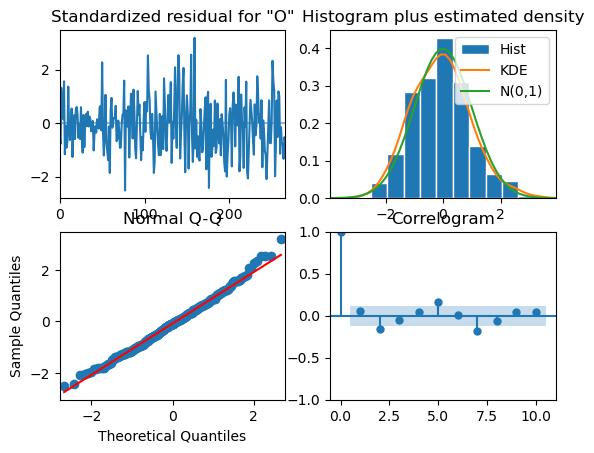

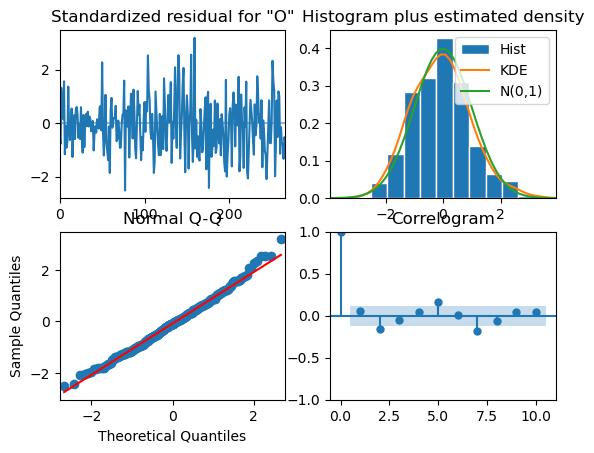

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame with the 'Overall_AQI_Avg' and 'City' columns
# Extracting the time series data
ts_data = df[['City', 'Overall_AQI_Avg']]

# Fit SARIMA model with increased maxiter and displaying convergence warnings
sarima_results = sarima_model.fit(disp=True, maxiter=1000, tol=1e-6, method='powell')

sarima_results.plot_diagnostics()





In [33]:
# Dictionary to store MSE and hyperparameters for each city
hyperparameters_dict = {'City': [], 'MSE': [], 'Hyperparameters': []}

# Iterate over unique cities and perform hyperparameter tuning
for city in df['City'].unique():
    city_data = ts_data[ts_data['City'] == city]['Overall_AQI_Avg']

    # Splitting the data into training and testing sets
    train_size = int(len(city_data) * 0.8)
    train, test = city_data[:train_size], city_data[train_size:]

    # Define the hyperparameter grid
    p_values = [0, 1, 2]
    d_values = [0, 1]
    q_values = [0, 1, 2]
    P_values = [0, 1, 2]
    D_values = [0, 1]
    Q_values = [0, 1, 2]
    S_values = [24]  # Assuming hourly data with a seasonality of 24 hours

In [34]:
# Assuming your datetime index is named 'timestamp'
train.index = pd.date_range(start=train.index[0], periods=len(train), freq='D')


In [35]:
print(train.index)
train.index = pd.to_datetime(train.index)


DatetimeIndex(['1970-01-01 00:00:00.000001825',
               '1970-01-02 00:00:00.000001825',
               '1970-01-03 00:00:00.000001825',
               '1970-01-04 00:00:00.000001825',
               '1970-01-05 00:00:00.000001825',
               '1970-01-06 00:00:00.000001825',
               '1970-01-07 00:00:00.000001825',
               '1970-01-08 00:00:00.000001825',
               '1970-01-09 00:00:00.000001825',
               '1970-01-10 00:00:00.000001825',
               ...
               '1970-10-10 00:00:00.000001825',
               '1970-10-11 00:00:00.000001825',
               '1970-10-12 00:00:00.000001825',
               '1970-10-13 00:00:00.000001825',
               '1970-10-14 00:00:00.000001825',
               '1970-10-15 00:00:00.000001825',
               '1970-10-16 00:00:00.000001825',
               '1970-10-17 00:00:00.000001825',
               '1970-10-18 00:00:00.000001825',
               '1970-10-19 00:00:00.000001825'],
              dtype=

In [36]:
print(train.index)
print(train.index.freq)


DatetimeIndex(['1970-01-01 00:00:00.000001825',
               '1970-01-02 00:00:00.000001825',
               '1970-01-03 00:00:00.000001825',
               '1970-01-04 00:00:00.000001825',
               '1970-01-05 00:00:00.000001825',
               '1970-01-06 00:00:00.000001825',
               '1970-01-07 00:00:00.000001825',
               '1970-01-08 00:00:00.000001825',
               '1970-01-09 00:00:00.000001825',
               '1970-01-10 00:00:00.000001825',
               ...
               '1970-10-10 00:00:00.000001825',
               '1970-10-11 00:00:00.000001825',
               '1970-10-12 00:00:00.000001825',
               '1970-10-13 00:00:00.000001825',
               '1970-10-14 00:00:00.000001825',
               '1970-10-15 00:00:00.000001825',
               '1970-10-16 00:00:00.000001825',
               '1970-10-17 00:00:00.000001825',
               '1970-10-18 00:00:00.000001825',
               '1970-10-19 00:00:00.000001825'],
              dtype=

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


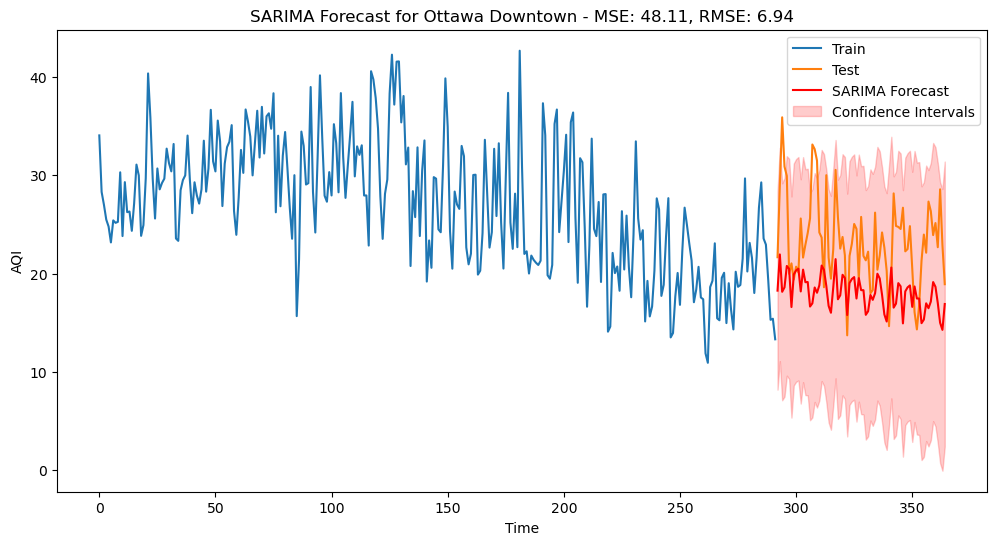

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

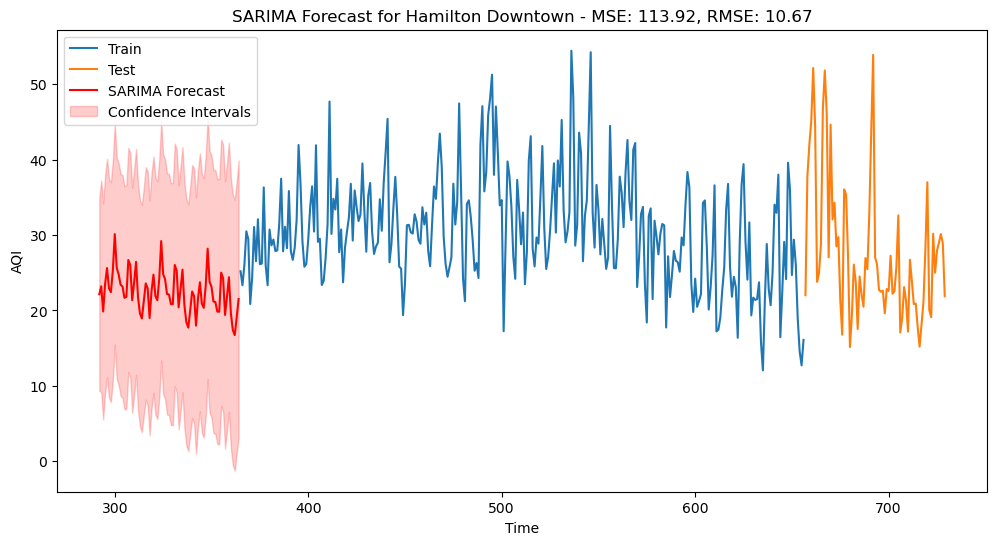

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

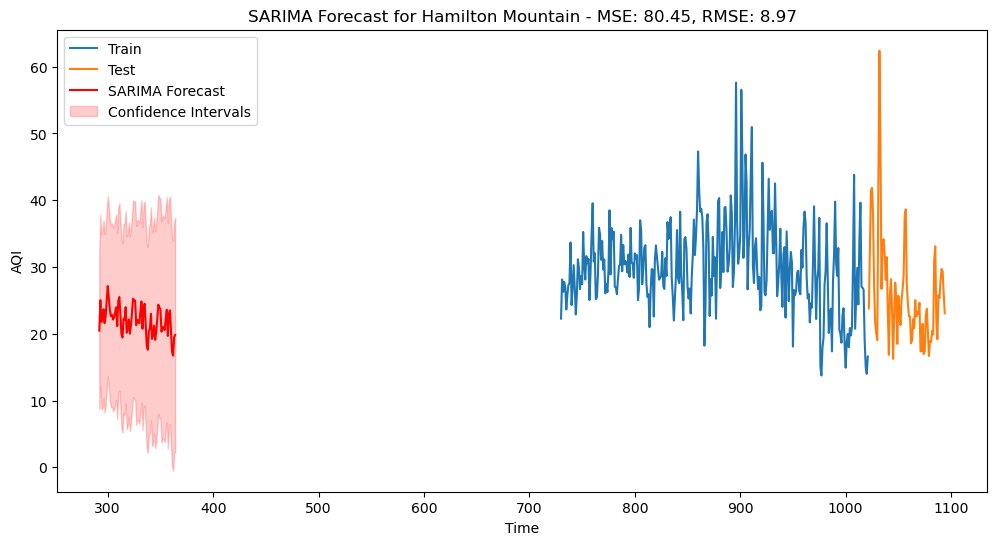

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

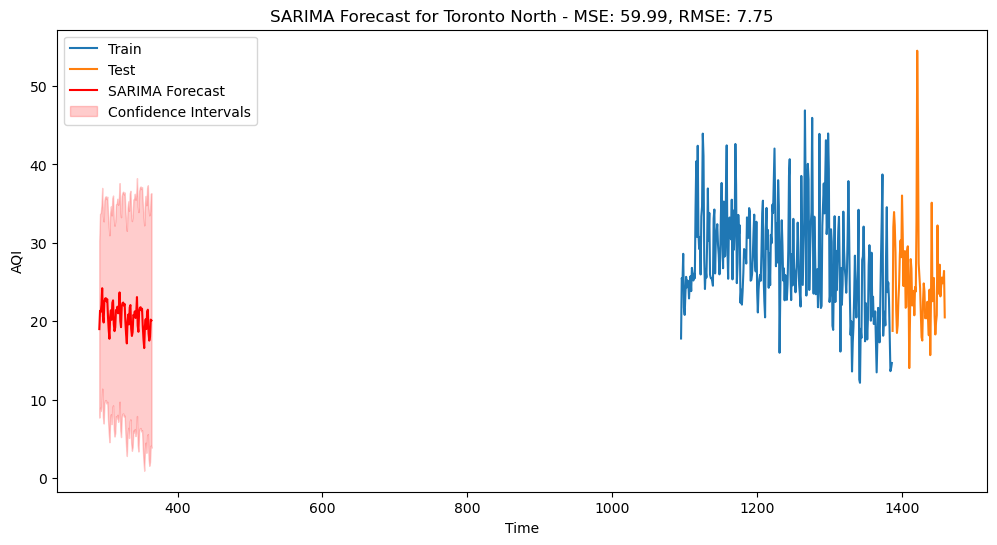

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is 

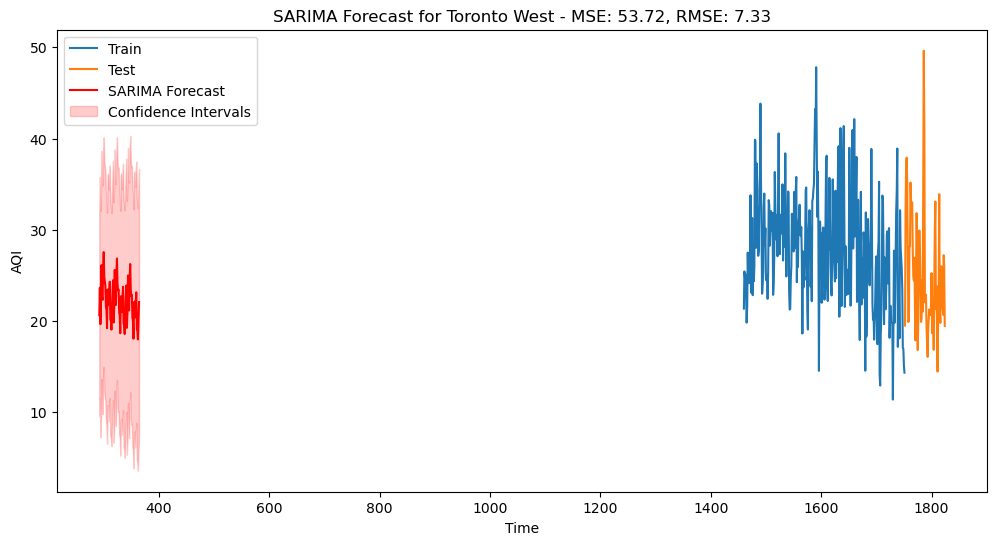

C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\rutvi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


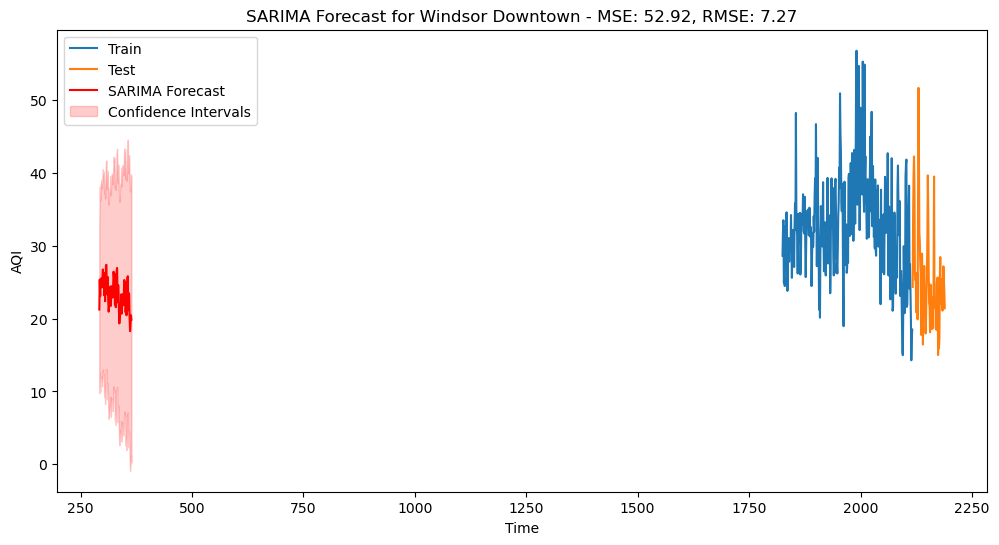

                City         MSE       RMSE
0    Ottawa Downtown   48.111448   6.936242
1  Hamilton Downtown  113.917833  10.673230
2  Hamilton Mountain   80.449094   8.969342
3      Toronto North   59.991524   7.745420
4       Toronto West   53.723590   7.329638
5   Windsor Downtown   52.924099   7.274895


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima

model = auto_arima(train, seasonal=True, suppress_warnings=True)


# Assuming df is your DataFrame with the 'Overall_AQI_Avg' and 'City' columns
# Extracting the time series data
ts_data = df[['City', 'Overall_AQI_Avg']]

# Dictionary to store MSE and RMSE values for each city
metrics_dict = {'City': [], 'MSE': [], 'RMSE': []}

# Iterate over unique cities and fit SARIMA models
for city in df['City'].unique():
    city_data = ts_data[ts_data['City'] == city]['Overall_AQI_Avg']

    # Splitting the data into training and testing sets
    train_size = int(len(city_data) * 0.8)
    train, test = city_data[:train_size], city_data[train_size:]

    # SARIMA model configuration
    order = (1, 1, 1)  # (p, d, q)
    seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S) - Assuming hourly data with a seasonality of 24 hours

    # Fit SARIMA model
    sarima_model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    sarima_results = sarima_model.fit()

    # Forecasting
    forecast_steps = len(test)
    sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)

    # Calculating MSE and RMSE
    mse = mean_squared_error(test, sarima_forecast.predicted_mean)
    rmse = np.sqrt(mse)

    # Store metrics in the dictionary
    metrics_dict['City'].append(city)
    metrics_dict['MSE'].append(mse)
    metrics_dict['RMSE'].append(rmse)

    # Confidence intervals (for plotting)
    confidence_intervals = sarima_forecast.conf_int()

    # Plotting for each city
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(sarima_forecast.predicted_mean.index, sarima_forecast.predicted_mean, label='SARIMA Forecast', color='red')
    plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='red', alpha=0.2, label='Confidence Intervals')
    plt.title(f'SARIMA Forecast for {city} - MSE: {mse:.2f}, RMSE: {rmse:.2f}')
    plt.xlabel('Time')
    plt.ylabel('AQI')
    plt.legend()
    plt.show()

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)
print(metrics_df)
